In [1]:
import nltk

In [2]:
print(nltk.__version__)

3.9.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv("sales datasets.csv")
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.columns = ['Month', 'Sales']

In [6]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df = df[df['Month'].str.match(r'\d{4}-\d{2}', na=False)]

In [8]:
df['Date'] = pd.to_datetime(df['Month'], format='%Y-%m')

In [9]:
df.set_index('Date', inplace=True)

In [10]:
df.head()
df.dtypes

Month     object
Sales    float64
dtype: object

In [11]:
df = df.sort_values('Date')


In [12]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [15]:
df = df.dropna()

In [16]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

df['Year'] = df['Month'].dt.year
df['Month'] = df['Month'].dt.month

In [17]:
X = df[['Year', 'Month']]
y = df['Sales']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [20]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 1438.5886890886109
RMSE: 2113.7617862957236


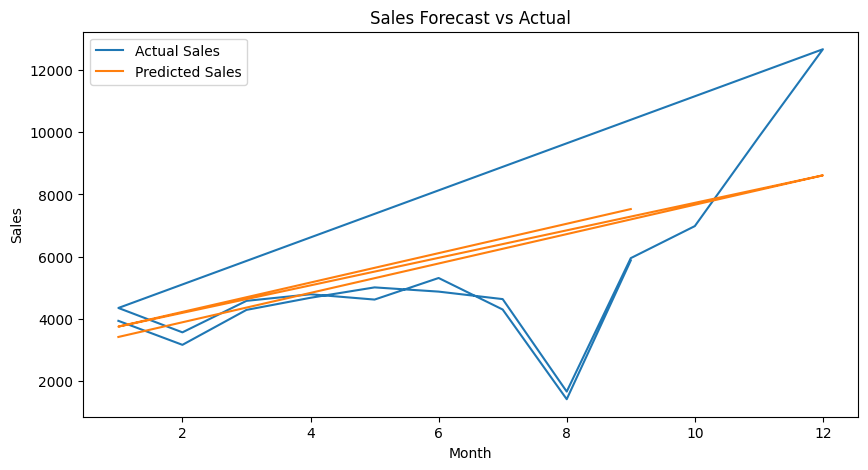

In [21]:
plt.figure(figsize=(10,5))
plt.plot(df['Month'].iloc[len(X_train):], y_test.values, label='Actual Sales')
plt.plot(df['Month'].iloc[len(X_train):], y_pred, label='Predicted Sales')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales Forecast vs Actual")
plt.legend()
plt.show()

In [22]:
future_dates = pd.date_range(start=df['Month'].max(), periods=31, freq='D')[1:]

future_df = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    
})

future_sales = model.predict(future_df)

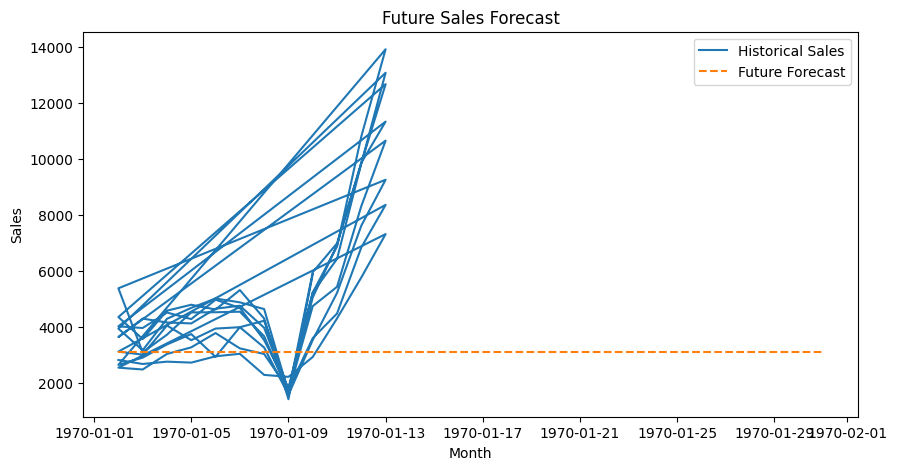

In [23]:
plt.figure(figsize=(10,5))
plt.plot(df['Month'], df['Sales'], label='Historical Sales')
plt.plot(future_dates, future_sales, label='Future Forecast', linestyle='--')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Future Sales Forecast")
plt.legend()
plt.show()

### Business Insights
- The model captures the overall sales trend from historical data.
- Forecast indicates expected sales movement for the next 30 days.
- This can help businesses plan inventory, staffing, and promotions.